# Generalization in Linear Model

In [1]:
# library
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression

from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# Data

In [7]:
boston= load_boston()

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [10]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
x=pd.DataFrame(boston["data"], columns=boston['feature_names'])
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


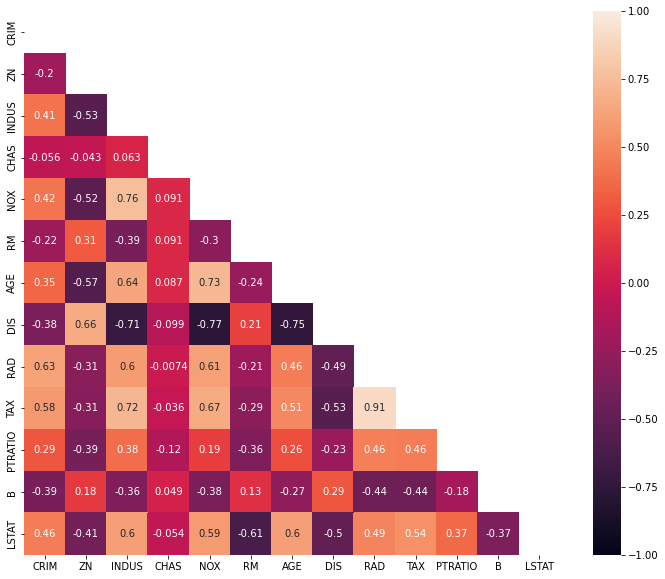

In [18]:
cormat=x.corr()
mask=np.triu(np.ones_like(cormat))

plt.figure(figsize=(12,10))
sns.heatmap(cormat, mask=mask, vmax=1, vmin=-1, annot=True)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['variables']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif
# multicolinearrity

,variables,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


In [24]:
y= pd.Series(boston['target'])
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

## Splitting data

In [25]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=2020) #tidak pakai stratify=y

# Ridge Regression

In [26]:
alpha=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.001, 0.0001, 0.00001]
training_mse=[]
testing_mse=[]
score=0

for i in range(len(alpha)):
    ridge= Ridge(alpha=alpha[i]) #model
    ridge.fit(x_train,y_train)
    
    y_predict_train= ridge.predict(x_train)
    training_mse.append(mean_squared_error(y_train,y_predict_train))
    
    y_predict_test= ridge.predict(x_test)
    mse_score= mean_squared_error(y_test,y_predict_test)
    testing_mse.append(mse_score)
    
    if i==0:
        score= mse_score
        best_alpha=alpha[i]
        
    elif score>mse_score:
        score=mse_score
        best_alpha= alpha[i]



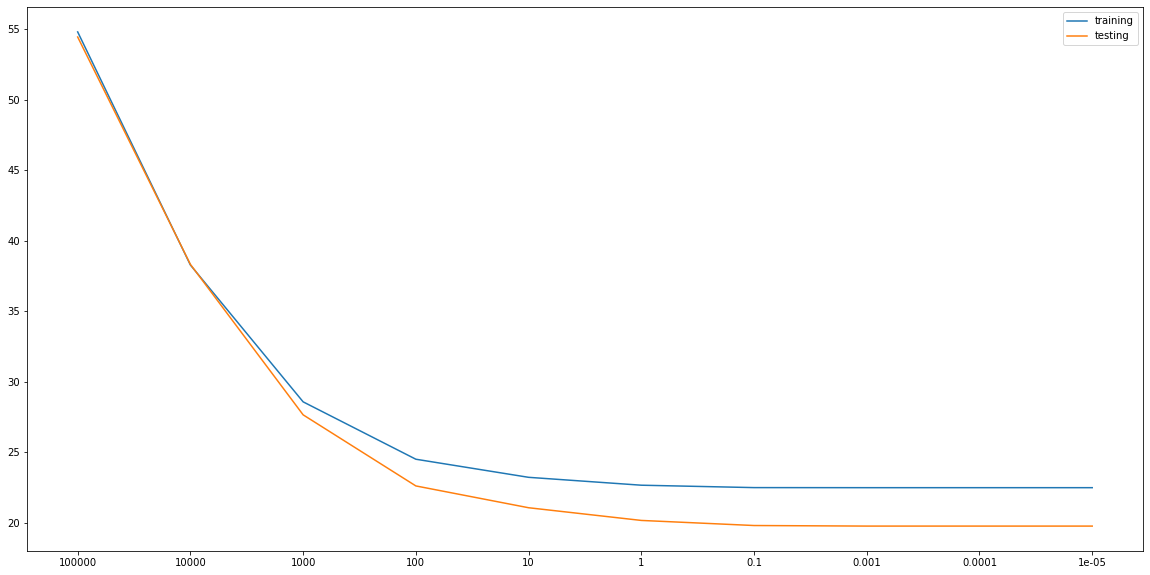

In [39]:
length=range(len(alpha))
plt.figure(figsize=(20,10))
sns.lineplot(x=length, y=training_mse)
sns.lineplot(x=length, y=testing_mse)
plt.legend(['training','testing'])
plt.xticks(length,alpha)

plt.show()

MSE= mean squared error, semakin kecil nilai MSE, semakin bagus hasil prediksi, karena errornya makin kecil  

Pada contoh di atas, semakin tinggi nilai alpha, semakin tinggi juga nilai MSE di train dan test, atau, semakin buruk performa model baik di data test maupun data train. Sehingga, kita bisa menyimpulkan bahwa, nilai alpha yang terlalu tinggi pada model Ridge regression bisa menyebabkan **underfitting**.

In [40]:
print(best_alpha, score)

1e-05 19.773995820684124


In [41]:
ridge= Ridge(alpha=0.00001)
ridge.fit(x_train,y_train)

Ridge(alpha=1e-05)

In [42]:
pd.DataFrame({
    'feature':list(x),
    'coef':ridge.coef_
}) #tanpa pinalty/ pinalty sangat rendah

,feature,coef
0,CRIM,-0.106957
1,ZN,0.044556
2,INDUS,0.023705
3,CHAS,2.237419
4,NOX,-16.858256
5,RM,3.879868
6,AGE,0.000054
7,DIS,-1.379542
8,RAD,0.304718
9,TAX,-0.012166


In [43]:
ridge2= Ridge(alpha=10000)
ridge2.fit(x_train,y_train)

Ridge(alpha=10000)

In [45]:
pd.DataFrame({
    'feature':list(x),
    'coef tanpa pinalty':ridge.coef_,
    'coef dengan pinalty': ridge2.coef_})
# nilai koefisien berubah, terutama di fitur NOX dan RM

,feature,coef tanpa pinalty,coef dengan pinalty
0,CRIM,-0.106957,-0.070553
1,ZN,0.044556,0.057446
2,INDUS,0.023705,-0.055953
3,CHAS,2.237419,0.010956
4,NOX,-16.858256,-0.000422
5,RM,3.879868,0.088552
6,AGE,0.000054,0.020635
7,DIS,-1.379542,-0.089601
8,RAD,0.304718,0.119815
9,TAX,-0.012166,-0.013712


# Lasso

In [48]:
alpha=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.001, 0.0001, 0.00001]
training_mse=[]
testing_mse=[]
score=0

for i in range(len(alpha)):
    lasso= Lasso(alpha=alpha[i]) #model
    lasso.fit(x_train,y_train)
    
    y_predict_train= lasso.predict(x_train)
    training_mse.append(mean_squared_error(y_train,y_predict_train))
    
    y_predict_test= lasso.predict(x_test)
    mse_score= mean_squared_error(y_test,y_predict_test)
    testing_mse.append(mse_score)
    
    if i==0:
        score= mse_score
        best_alpha=alpha[i]
        
    elif score>mse_score:
        score=mse_score
        best_alpha= alpha[i]

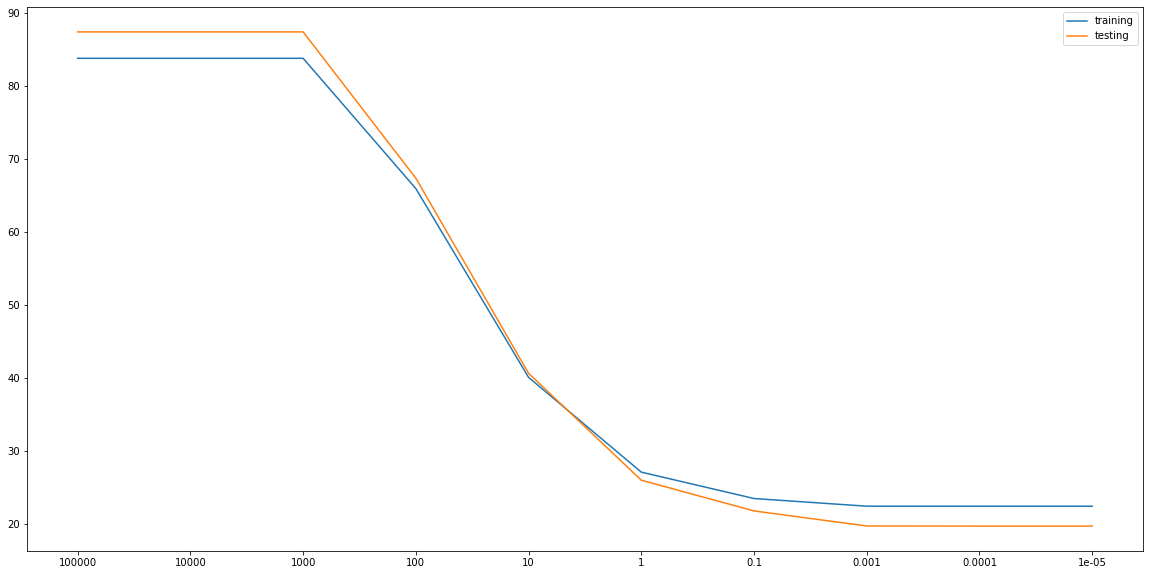

In [49]:
length=range(len(alpha))
plt.figure(figsize=(20,10))
sns.lineplot(x=length, y=training_mse)
sns.lineplot(x=length, y=testing_mse)
plt.legend(['training','testing'])
plt.xticks(length,alpha)

plt.show()

In [50]:
best_alpha, score

(1e-05, 19.774129174052426)

Seperti di Ridge, pada Lasso, semakin tinggi nilai alpha, semakin rendah performa model baik pada data test maupun train (SME makin tinggi), ini menunjukkan terjadinya **underfitting**.  

Bedanya, dengan Lasso, pada titik alpha=1000, performa model menjadi stagnant. Ini dikarenakan, Lasso bisa membuat koefisien fitur kita menjadi =0, sehingga pada titik di mana semua koefisien=0, maka model tidak akan berubah lagi.

In [51]:
lasso=Lasso(alpha=0.00001)
lasso.fit(x_train,y_train)

Lasso(alpha=1e-05)

In [54]:
lasso2= Lasso(alpha=10000)
lasso2.fit(x_train,y_train)

Lasso(alpha=10000)

In [55]:
pd.DataFrame({
    'features':x.columns,
    'coef alpha rendah': lasso.coef_,
    'coef alpha tinggi': lasso2.coef_
})


,features,coef alpha rendah,coef alpha tinggi
0,CRIM,-0.106955,-0.0
1,ZN,0.044556,0.0
2,INDUS,0.023692,-0.0
3,CHAS,2.237224,0.0
4,NOX,-16.854983,-0.0
5,RM,3.879876,0.0
6,AGE,0.000052,-0.0
7,DIS,-1.379490,0.0
8,RAD,0.304710,-0.0
9,TAX,-0.012166,-0.0


In [57]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [60]:
pd.DataFrame({
    'features':x.columns,
    'linear model': lm.coef_,
    'ridge alpha tinggi': ridge2.coef_,
    'lasso alpha tinggi': lasso2.coef_
})
#sama=sama alpha=10000

,features,linear model,ridge alpha tinggi,lasso alpha tinggi
0,CRIM,-0.106957,-0.070553,-0.0
1,ZN,0.044556,0.057446,0.0
2,INDUS,0.023705,-0.055953,-0.0
3,CHAS,2.237422,0.010956,0.0
4,NOX,-16.858394,-0.000422,-0.0
5,RM,3.879867,0.088552,0.0
6,AGE,0.000055,0.020635,-0.0
7,DIS,-1.379544,-0.089601,0.0
8,RAD,0.304718,0.119815,-0.0
9,TAX,-0.012166,-0.013712,-0.0


In [62]:
import statsmodels.api as sm

In [63]:
ols=sm.OLS(y_train,sm.add_constant(x_train))
result=ols.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     81.71
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          1.24e-102
Time:                        10:45:23   Log-Likelihood:                -1202.2
No. Observations:                 404   AIC:                             2432.
Df Residuals:                     390   BIC:                             2488.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6673      5.784      5.993      0.0

In [75]:
alpha=[0.001,0.01,0.1,0.5,1]
coef=[]
for i in alpha:
    lasso=Lasso(alpha=i)
    lasso.fit(x_train,y_train)
    coef.append(lasso.coef_)


pd.DataFrame(coef, columns=x.columns, index=alpha)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0.001,-0.106746,0.044582,0.022342,2.217609,-16.517894,3.880717,-0.000176,-1.374139,0.303877,-0.012196,-0.910763,0.009168,-0.528416
0.010,-0.104848,0.044823,0.010072,2.039308,-13.454063,3.888356,-0.002256,-1.325520,0.296313,-0.012469,-0.880110,0.009346,-0.533697
0.100,-0.095948,0.046401,-0.027939,0.456889,-0.000000,3.794204,-0.008571,-1.074077,0.271127,-0.014342,-0.753144,0.010151,-0.570024
0.500,-0.080405,0.046351,-0.001037,0.000000,-0.000000,2.593729,0.005035,-0.837098,0.269843,-0.015024,-0.732942,0.009461,-0.655729
1.000,-0.060924,0.045453,-0.000000,0.000000,-0.000000,1.050010,0.022870,-0.561259,0.255914,-0.014760,-0.697761,0.008422,-0.760681


# Key Takeaway
* Ridge: pinalty (alpha) akan membuat nilai koefisien fitur turun mendekati 0
* Lasso: pinalty akan membuat nilai koefisien fitur turun sampai 0
* baik pada ridge naupun lasso, nilai alpha yang terlalu tinggi akan menyebabkan underfitting (ditandai dengan nilai MSE yang tinggi di data test dan train), karena model menjadi terlalu simple.